# Excercises from 1st Lecture

Setup:

In [214]:
%load_ext autoreload
%autoreload 2

import numpy as np
import numba as nb

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from EconModel import EconModelClass, jit  

from ConSavModel_exc import ConSavModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Initialize the model:

In [215]:
model_b = ConSavModelClass()
model_org = model_b.copy(name='model_original') 

Namespaces

In [216]:
# test model
par = model_b.par
sol = model_b.sol
sim = model_b.sim

# original model
par_orig = model_org.par
sol_orig = model_org.sol
sim_orig = model_org.sim

In [218]:
# Test parameters
par.b = -0.8
par.Nz = 7
print(par.b,par.Nz)

# Original model 
par_orig.b = 0.
par_orig.Nz = 7
print(par_orig.b,par_orig.Nz)

-0.8 7
0.0 7


Solve the model

In [219]:
model_b.solve(do_print=True, algo='vfi')

iteration    0 solved in 31.4 secs  [max abs. diff. 2.01e+00]
iteration    1 solved in 0.1 secs   [max abs. diff. 1.87e+00]
iteration    2 solved in 0.1 secs   [max abs. diff. 1.75e+00]
iteration    3 solved in 0.2 secs   [max abs. diff. 1.63e+00]
iteration    4 solved in 0.2 secs   [max abs. diff. 1.52e+00]
iteration    5 solved in 0.1 secs   [max abs. diff. 1.41e+00]
iteration    6 solved in 0.2 secs   [max abs. diff. 1.31e+00]
iteration    7 solved in 0.1 secs   [max abs. diff. 1.22e+00]
iteration    8 solved in 0.2 secs   [max abs. diff. 1.13e+00]
iteration    9 solved in 0.1 secs   [max abs. diff. 1.05e+00]
iteration  100 solved in 0.1 secs   [max abs. diff. 4.23e-04]
iteration  200 solved in 0.1 secs   [max abs. diff. 1.44e-07]
iteration  234 solved in 0.1 secs   [max abs. diff. 9.58e-09]
model solved in 57.7 secs


In [220]:
model_org.solve(do_print=True, algo='vfi')

iteration    0 solved in 27.0 secs  [max abs. diff.   inf]


/Users/marcusmyrtuechristiansen/Documents/Polit/HAM/AdvMacroHet/01/Solutions/ConSavModel_exc.py:157: RuntimeWarning: invalid value encountered in subtract
  sim.Dbeg[0,:,0] = par.z_ergodic


iteration    1 solved in 0.2 secs   [max abs. diff.   nan]
iteration    2 solved in 0.3 secs   [max abs. diff.   nan]
iteration    3 solved in 0.2 secs   [max abs. diff.   nan]
iteration    4 solved in 0.3 secs   [max abs. diff.   nan]
iteration    5 solved in 0.3 secs   [max abs. diff.   nan]
iteration    6 solved in 0.3 secs   [max abs. diff.   nan]
iteration    7 solved in 0.3 secs   [max abs. diff.   nan]
iteration    8 solved in 0.3 secs   [max abs. diff.   nan]
iteration    9 solved in 0.3 secs   [max abs. diff.   nan]
iteration  100 solved in 0.4 secs   [max abs. diff.   nan]
iteration  200 solved in 0.3 secs   [max abs. diff.   nan]
iteration  300 solved in 0.3 secs   [max abs. diff.   nan]
iteration  400 solved in 0.3 secs   [max abs. diff.   nan]
iteration  500 solved in 0.3 secs   [max abs. diff.   nan]
iteration  600 solved in 0.3 secs   [max abs. diff.   nan]
iteration  700 solved in 0.3 secs   [max abs. diff.   nan]
iteration  800 solved in 0.3 secs   [max abs. diff.   na

Traceback (most recent call last):
  File "/Users/marcusmyrtuechristiansen/Documents/Polit/HAM/AdvMacroHet/01/Solutions/ConSavModel_exc.py", line 156, in solve
    solve_hh_backwards_vfi(par,vbeg_plus,c_plus,sol.vbeg,sol.c,sol.a)
KeyboardInterrupt
Traceback (most recent call last):
  File "/Users/marcusmyrtuechristiansen/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/dm/dh79dpd138d4hnwl82qqy1gm0000gn/T/ipykernel_67965/3264876646.py", line 1, in <cell line: 1>
    model_org.solve(do_print=True, algo='vfi')
  File "/Users/marcusmyrtuechristiansen/Documents/Polit/HAM/AdvMacroHet/01/Solutions/ConSavModel_exc.py", line 156, in solve
    solve_hh_backwards_vfi(par,vbeg_plus,c_plus,sol.vbeg,sol.c,sol.a)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/marcusmyrtuechristiansen/opt

"\n# Standard model\nax = fig.add_subplot(1,2,2)\nfor i_z in range(par_orig.Nz):\n    ax.plot(par_orig.a_grid,sol_orig.a[i_z,:]-par_orig.a_grid)\n    \nax.set_title(f'Borrowing constraint, b = {par_orig.b:.1f}')\nax.set_xlabel('$a_{t-1}$')\nax.set_ylabel('$a_t^{\\ast}-a_{t-1}$');"

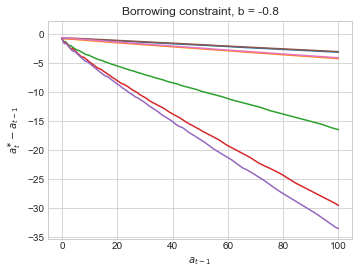

In [222]:
# Adjusted model
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,2,1,sharey=ax)
for i_z in range(par.Nz):
    ax.plot(par.a_grid,sol.a[i_z,:]-par.a_grid)
    
ax.set_title(f'Borrowing constraint, b = {par.b:.1f}')
ax.set_xlabel('$a_{t-1}$')
ax.set_ylabel('$a_t^{\\ast}-a_{t-1}$');

"""
# Standard model
ax = fig.add_subplot(1,2,2)
for i_z in range(par_orig.Nz):
    ax.plot(par_orig.a_grid,sol_orig.a[i_z,:]-par_orig.a_grid)
    
ax.set_title(f'Borrowing constraint, b = {par_orig.b:.1f}')
ax.set_xlabel('$a_{t-1}$')
ax.set_ylabel('$a_t^{\\ast}-a_{t-1}$');"""

Shows values for graphs above:

In [225]:
N_beg =  0
N_end = 150    # max = 500
Z_state = 1

print(f'|    Z-state: {Z_state:3d}   |')
print(f'|  b={par.b:.1f}    b={par_orig.b:.1f}  |')
print('|-------------------|')

for i,j in zip(sol.a[Z_state,N_beg:N_end]-par.a_grid[N_beg:N_end],sol_orig.a[Z_state,N_beg:N_end]-par_orig.a_grid[N_beg:N_end]):
    if i < 0 and j < 0:
        print(f'|  {i:.2f}  |  {j:.2f}  |')
    elif i < 0 and j >= 0:
        print(f'|  {i:.2f}  |   {j:.2f}  |')
    elif i >= 0 and j < 0:
        print(f'|   {i:.2f}  |  {j:.2f}  |')
    else:
        print(f'|   {i:.2f}  |   {j:.2f}  |')
    

|    Z-state:   1   |
|  b=-0.8    b=0.0  |
|-------------------|
|  -0.70  |   0.01  |
|  -0.70  |   0.00  |
|  -0.71  |  -0.00  |
|  -0.71  |  -0.00  |
|  -0.71  |  -0.01  |
|  -0.72  |  -0.01  |
|  -0.72  |  -0.01  |
|  -0.72  |  -0.02  |
|  -0.73  |  -0.02  |
|  -0.73  |  -0.02  |
|  -0.73  |  -0.03  |
|  -0.74  |  -0.03  |
|  -0.74  |  -0.03  |
|  -0.74  |  -0.04  |
|  -0.75  |  -0.04  |
|  -0.75  |  -0.04  |
|  -0.75  |  -0.05  |
|  -0.76  |  -0.05  |
|  -0.76  |  -0.05  |
|  -0.76  |  -0.06  |
|  -0.77  |  -0.06  |
|  -0.77  |  -0.07  |
|  -0.77  |  -0.07  |
|  -0.77  |  -0.07  |
|  -0.77  |  -0.08  |
|  -0.77  |  -0.08  |
|  -0.77  |  -0.08  |
|  -0.77  |  -0.09  |
|  -0.77  |  -0.09  |
|  -0.77  |  -0.10  |
|  -0.77  |  -0.10  |
|  -0.77  |  -0.11  |
|  -0.77  |  -0.11  |
|  -0.77  |  -0.11  |
|  -0.77  |  -0.12  |
|  -0.77  |  -0.12  |
|  -0.77  |  -0.13  |
|  -0.77  |  -0.13  |
|  -0.77  |  -0.14  |
|  -0.76  |  -0.14  |
|  -0.76  |  -0.15  |
|  -0.76  |  -0.15  |
|  -0.76  

In [281]:
# testing 
from consav.quadrature import log_normal_gauss_hermite

sigma_xi = 0.00001
Nxi = 5
xi_grid, xi_weights = log_normal_gauss_hermite(sigma_xi,Nxi) 

print(xi_grid)
print(xi_weights)

a = np.zeros((Nxi,1))
ii = 0
for i,j in zip(xi_grid,xi_weights):
    a[ii,0] = i * j
    ii += 1
    
print(a)
print(f'Sum of a = {np.sum(a):.6f}')


# broadcast_to(par.xi_weights,(par.Nxi,par.Nxi))
bc_xi = np.broadcast_to(xi_weights,(Nxi,Nxi)) 


# combined
Nzc = Nxi*par.Nz

# par.z_grid = np.repeat(par.xi_grid,par.Nzt)*np.tile(par.zt_grid,par.Nxi)
z_grid = np.repeat(xi_grid,par.Nz)*np.tile(par.z_grid,Nxi) 
print(par.z_grid.size,z_grid.size)
print(par.z_grid,'\n')
print('np.repeat\n',np.repeat(xi_grid,par.Nz),'\n')
print(np.tile(par.z_grid,Nxi),'\n')
print(z_grid)





[0.99997143 0.99998644 1.         1.00001356 1.00002857]
[0.01125741 0.22207592 0.53333333 0.22207592 0.01125741]
[[0.01125709]
 [0.22207291]
 [0.53333333]
 [0.22207893]
 [0.01125773]]
Sum of a = 1.000000


ValueError: operands could not be broadcast together with shapes (35,) (50,) 

In [232]:
from consav.linear_interp import binary_search, interp_1d

In [314]:
Nz = 7
Na = 11
a_max = 10
a_grid = np.linspace(10,20,6)  ## np.linspace(0,a_max,Na)
vbeg_plus = np.linspace(20,30,6)
vbeg_plus_2 = np.broadcast_to(np.linspace(10,20,5),(5,5)) # np.zeros((Nz,Na))
a = 2
i_z = 1

In [315]:
print(a_grid,'\n','1 x',a_grid.size,'\n')

print(vbeg_plus,'\n',Nz,'x',Na)

[10. 12. 14. 16. 18. 20.] 
 1 x 6 

[20. 22. 24. 26. 28. 30.] 
 7 x 11


In [336]:
# vbeg_plus_interp = interp_1d(a_grid,vbeg_plus[i_z,:],a)

vbeg_plus = np.linspace(20,50,6)

interp_1d(a_grid,vbeg_plus,1)


-7.0